<a href="https://colab.research.google.com/github/atarasaki/DSWP-editados/blob/main/2020-11-25-LabDataChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## notebook para o Kaggle - construção em aula - 23/11/2020

In [1]:
## importa pycaret
!pip install pycaret

     |████████████████████████████████| 256kB 8.4MB/s 
     |████████████████████████████████| 148.9MB 80kB/s 
     |████████████████████████████████| 1.6MB 39.8MB/s 
     |████████████████████████████████| 1.8MB 32.8MB/s 
     |████████████████████████████████| 66.3MB 79kB/s 
     |████████████████████████████████| 13.9MB 37.0MB/s 
     |████████████████████████████████| 276kB 53.5MB/s 
     |████████████████████████████████| 102kB 10.5MB/s 
     |████████████████████████████████| 266kB 52.3MB/s 
     |████████████████████████████████| 174kB 37.8MB/s 
     |████████████████████████████████| 6.8MB 43.8MB/s 
     |████████████████████████████████| 81kB 8.2MB/s 
     |████████████████████████████████| 163kB 54.6MB/s 
     |████████████████████████████████| 153kB 54.4MB/s 
     |████████████████████████████████| 1.1MB 34.0MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 337kB 48.2MB/s 
     |████████████████████████████████| 2.1MB 32.0MB/

In [2]:
!pip install shap

     |████████████████████████████████| 327kB 12.5MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463902 sha256=9f46294971f19b511abb35bc8dd6fb527225d9bdbb835a33131dbb1fe116750e
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

import seaborn as sns
sns.set_theme(style='ticks', palette='pastel')

from pycaret import regression, classification
import shap

from collections import Counter

import tensorflow as tf
from tensorflow import keras

In [4]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


## Configurações de ambiente

In [5]:
pd_od = pd.options.display

In [67]:
pd_od.max_columns= 50
pd_od.max_rows = 50
pd_od.precision = 3

#pd_od.float_format = '{:,.2f}'

In [8]:
# alternativa
# pd.set_option('display.precision',3)
#pd.set_option('display.max_columns',50)
# pd.set_option('display.max_rows',50)

## Facets - DataViz

In [9]:
from IPython.core.display import display, HTML
import base64

In [10]:
!pip install facets-overview==1.0.0

In [11]:
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator

In [39]:
# treino
url_T = 'https://raw.githubusercontent.com/atarasaki/DSWP-editados/main/Datasets/Labdata%20Churn%20Challenge%202020/train.csv'

# validação/teste
url_V = 'https://raw.githubusercontent.com/atarasaki/DSWP-editados/main/Datasets/Labdata%20Churn%20Challenge%202020/test.csv'

In [40]:
df_T = pd.read_csv( url_T, index_col='id' )

df_V = pd.read_csv( url_V, index_col='id' )

In [41]:
df_T.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
id                                                                    
4030  Female              0      No         No    56.0           No   
6731    Male              0     Yes        Yes     NaN          Yes   
6479  Female              0     Yes         No    60.0          Yes   
6861  Female              0      No         No    37.0          Yes   
3266    Male              0     Yes        Yes    29.0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
id                                                            
4030  No phone service             DSL                  Yes   
6731                No              No  No internet service   
6479               Yes     Fiber optic                   No   
6861               Yes     Fiber optic                   No   
3266                No     Fiber optic                   No   

             OnlineBackup     DeviceProtection          TechSupport  \
id                                                                    
4030                  Yes                  Yes                  Yes   
6731  No internet service  No internet service  No internet service   
6479                  Yes                  Yes                  Yes   
6861                  Yes                  Yes                   No   
3266                   No                   No                   No   

              StreamingTV      StreamingMovies        Contract  \
id                                                               
4030                   No                   No        Two year   
6731  No internet service  No internet service        One year   
6479                  Yes                  Yes        Two year   
6861                  Yes                  Yes  Month-to-month   
3266                   No                   No  Month-to-month   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
id                                                                              
4030               No                        NaN           45.05       2560.1   
6731               No               Mailed check           19.65       332.65   
6479              Yes    Credit card (automatic)          110.80       6640.7   
6861              Yes  Bank transfer (automatic)          101.90      3545.35   
3266              Yes           Electronic check           70.75       1974.8   

      Churn  
id           
4030      0  
6731      0  
6479      0  
6861      1  
3266      1

In [42]:
df_T.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [43]:
# Conversão de tipos : TotalCharges deveria ser float e está como object

df_T['TotalCharges2'] = pd.to_numeric( df_T['TotalCharges'], errors='coerce' )
df_T.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
TotalCharges2       float64
dtype: object

In [44]:
# aparentemente, conversão bem sucedida
df_T[['TotalCharges','TotalCharges2']].head()

TotalCharges  TotalCharges2
id                              
4030       2560.1        2560.10
6731       332.65         332.65
6479       6640.7        6640.70
6861      3545.35        3545.35
3266       1974.8        1974.80

In [45]:
# índice 161 havia sido reportado na conversão pd.to_numeric() sem a opção errors='coerce'
df_T.loc[161,['TotalCharges','TotalCharges2']]

TotalCharges     764.55
TotalCharges2       765
Name: 161, dtype: object

In [46]:
# missing values nas colunas 'TotalCharges' e 'TotalCharges2'

df_T[['TotalCharges','TotalCharges2']].isnull().sum()

TotalCharges     0
TotalCharges2    8
dtype: int64

In [47]:
# deleta 'TotalCharges'

df_T = df_T.drop( columns=['TotalCharges'], axis=1 )
df_T.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
id                                                                    
4030  Female              0      No         No    56.0           No   
6731    Male              0     Yes        Yes     NaN          Yes   
6479  Female              0     Yes         No    60.0          Yes   
6861  Female              0      No         No    37.0          Yes   
3266    Male              0     Yes        Yes    29.0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
id                                                            
4030  No phone service             DSL                  Yes   
6731                No              No  No internet service   
6479               Yes     Fiber optic                   No   
6861               Yes     Fiber optic                   No   
3266                No     Fiber optic                   No   

             OnlineBackup     DeviceProtection          TechSupport  \
id                                                                    
4030                  Yes                  Yes                  Yes   
6731  No internet service  No internet service  No internet service   
6479                  Yes                  Yes                  Yes   
6861                  Yes                  Yes                   No   
3266                   No                   No                   No   

              StreamingTV      StreamingMovies        Contract  \
id                                                               
4030                   No                   No        Two year   
6731  No internet service  No internet service        One year   
6479                  Yes                  Yes        Two year   
6861                  Yes                  Yes  Month-to-month   
3266                   No                   No  Month-to-month   

     PaperlessBilling              PaymentMethod  MonthlyCharges  Churn  \
id                                                                        
4030               No                        NaN           45.05      0   
6731               No               Mailed check           19.65      0   
6479              Yes    Credit card (automatic)          110.80      0   
6861              Yes  Bank transfer (automatic)          101.90      1   
3266              Yes           Electronic check           70.75      1   

      TotalCharges2  
id                   
4030        2560.10  
6731         332.65  
6479        6640.70  
6861        3545.35  
3266        1974.80

In [48]:
# 'SeniorCitizen' está como int64, mas deveria ser categórica
Counter( df_T['SeniorCitizen'] )

Counter({0: 4740, 1: 894})

In [49]:
# alternativa
df_T['SeniorCitizen'].value_counts()

0    4740
1     894
Name: SeniorCitizen, dtype: int64

In [50]:
# conveniente a nomenclatura Yes/No para o momento de criar dummy variables : nomes de coluna mais legíveis
d_SeniorCitizen = { 0 : 'No', 1 : 'Yes'}

In [51]:
df_T['SeniorCitizen2'] = df_T['SeniorCitizen'].map( d_SeniorCitizen )
df_T['SeniorCitizen2'].head()

id
4030    No
6731    No
6479    No
6861    No
3266    No
Name: SeniorCitizen2, dtype: object

In [52]:
df_T.drop( columns=['SeniorCitizen'], inplace=True )
df_T.head()

gender Partner Dependents  tenure PhoneService     MultipleLines  \
id                                                                       
4030  Female      No         No    56.0           No  No phone service   
6731    Male     Yes        Yes     NaN          Yes                No   
6479  Female     Yes         No    60.0          Yes               Yes   
6861  Female      No         No    37.0          Yes               Yes   
3266    Male     Yes        Yes    29.0          Yes                No   

     InternetService       OnlineSecurity         OnlineBackup  \
id                                                               
4030             DSL                  Yes                  Yes   
6731              No  No internet service  No internet service   
6479     Fiber optic                   No                  Yes   
6861     Fiber optic                   No                  Yes   
3266     Fiber optic                   No                   No   

         DeviceProtection          TechSupport          StreamingTV  \
id                                                                    
4030                  Yes                  Yes                   No   
6731  No internet service  No internet service  No internet service   
6479                  Yes                  Yes                  Yes   
6861                  Yes                   No                  Yes   
3266                   No                   No                   No   

          StreamingMovies        Contract PaperlessBilling  \
id                                                           
4030                   No        Two year               No   
6731  No internet service        One year               No   
6479                  Yes        Two year              Yes   
6861                  Yes  Month-to-month              Yes   
3266                   No  Month-to-month              Yes   

                  PaymentMethod  MonthlyCharges  Churn  TotalCharges2  \
id                                                                      
4030                        NaN           45.05      0        2560.10   
6731               Mailed check           19.65      0         332.65   
6479    Credit card (automatic)          110.80      0        6640.70   
6861  Bank transfer (automatic)          101.90      1        3545.35   
3266           Electronic check           70.75      1        1974.80   

     SeniorCitizen2  
id                   
4030             No  
6731             No  
6479             No  
6861             No  
3266             No

# listas por tipos de variáveis

Criados dataframes sem missing values

* df_TotalCharges2_sem_mv

* df_tenure_sem_mv

* df_PaymentMethod_sem_mv

* df_Dependents_sem_mv

In [53]:
l_features_numericas = list( df_T.select_dtypes( [np.float64, np.int64] ) )
l_features_numericas.remove('Churn')
l_features_numericas

['tenure', 'MonthlyCharges', 'TotalCharges2']

In [54]:
l_features_categoricas = list( df_T.select_dtypes( np.object ) )
l_features_categoricas

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen2']

# DataViz com Facets

In [55]:
def mostra_dados( df ):
  fsg = FeatureStatisticsGenerator()
  dataframes = [ {'table': df, 'name': 'trainData'} ]
  censusProto = fsg.ProtoFromDataFrames(dataframes)
  protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")
  HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
  html = HTML_TEMPLATE.format(protostr=protostr)
  display(HTML(html))

In [56]:
mostra_dados( df_T )

# tratamento dos missing values

como trata os missing values ?

construir modelos preditivos para estimas os valores missing em em função das demais variáveis que não são missing

variáveis :
numéricas

* TotalCharges2 (0,14%)

* tenure (8,18%)


categóricas

* PaymentMethod (1,76%)

* Dependents (3,87%)


In [57]:
# backup antes de transformações
df_T_org = df_T.copy()

In [58]:
# restaura valores
#df_T = df_T_org

In [59]:
df_T.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 4030 to 103
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   Partner           5634 non-null   object 
 2   Dependents        5416 non-null   object 
 3   tenure            5173 non-null   float64
 4   PhoneService      5634 non-null   object 
 5   MultipleLines     5634 non-null   object 
 6   InternetService   5634 non-null   object 
 7   OnlineSecurity    5634 non-null   object 
 8   OnlineBackup      5634 non-null   object 
 9   DeviceProtection  5634 non-null   object 
 10  TechSupport       5634 non-null   object 
 11  StreamingTV       5634 non-null   object 
 12  StreamingMovies   5634 non-null   object 
 13  Contract          5634 non-null   object 
 14  PaperlessBilling  5634 non-null   object 
 15  PaymentMethod     5535 non-null   object 
 16  MonthlyCharges    5634 non-null   float6

In [60]:
# função para construir modelos ML para estimar os missing values

def prepara_dataframes( df, target, l_colunas_mv ):
  nome_df2 = 'df' + '_' + target + '_sem_mv' # constrói nome de um novo dataframe
  print( nome_df2 )

  l_colunas_mv.remove( target )
  print( f'Features ignoradas : {l_colunas_mv}')

  df2 = df.copy()
  df3 = df.copy()

  df2 = df2.dropna() # exclui todas as linhas com missing values
  df2 = df2.drop( columns=['Churn'], axis=1 )

  # para reduzir o bias, drop features que são missing values
  df2 = df2.drop( columns=l_colunas_mv, axis=1 )
  print( df2.isna().sum() )

  # apontar os missing values
  df3[target + '_mv'] = np.where( df3[target].isna(), 1, 0)

  return ( df2, df3 )

In [61]:
# colunas com missing values
l_colunas_mv = ['TotalCharges2','tenure','PaymentMethod','Dependents']

# l_colunas_mv é modificada pela função 'prepara_dataframes()'
l_colunas_loop = l_colunas_mv.copy()

# trata as variáveis em loop : 'TotalCharges2', 'tenure', 'PaymentMethod', 'Dependents'

for target in l_colunas_loop:
  nome_df2 = 'df' + '_' + target + '_sem_mv'
  print( nome_df2 )
  vars()[nome_df2], df_T = prepara_dataframes( df_T, target, l_colunas_mv )

df_TotalCharges2_sem_mv
df_TotalCharges2_sem_mv
Features ignoradas : ['tenure', 'PaymentMethod', 'Dependents']
gender              0
Partner             0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges2       0
SeniorCitizen2      0
dtype: int64
df_tenure_sem_mv
df_tenure_sem_mv
Features ignoradas : ['PaymentMethod', 'Dependents']
gender              0
Partner             0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges2       0
SeniorCitizen2      0
TotalCharges2_mv    0
dtype: int64
df_PaymentMethod_sem_mv
df_P

In [62]:
df_TotalCharges2_sem_mv

gender Partner PhoneService     MultipleLines InternetService  \
id                                                                    
6479  Female     Yes          Yes               Yes     Fiber optic   
6861  Female      No          Yes               Yes     Fiber optic   
3266    Male     Yes          Yes                No     Fiber optic   
6368    Male      No           No  No phone service             DSL   
5830    Male     Yes           No  No phone service             DSL   
...      ...     ...          ...               ...             ...   
946   Female      No          Yes               Yes     Fiber optic   
6684    Male      No           No  No phone service             DSL   
4803  Female      No          Yes                No             DSL   
6317    Male     Yes          Yes               Yes              No   
103     Male      No          Yes               Yes     Fiber optic   

           OnlineSecurity         OnlineBackup     DeviceProtection  \
id                                                                    
6479                   No                  Yes                  Yes   
6861                   No                  Yes                  Yes   
3266                   No                   No                   No   
6368                  Yes                   No                  Yes   
5830                  Yes                   No                  Yes   
...                   ...                  ...                  ...   
946                    No                   No                   No   
6684                   No                   No                  Yes   
4803                   No                  Yes                   No   
6317  No internet service  No internet service  No internet service   
103                    No                   No                  Yes   

              TechSupport          StreamingTV      StreamingMovies  \
id                                                                    
6479                  Yes                  Yes                  Yes   
6861                   No                  Yes                  Yes   
3266                   No                   No                   No   
6368                  Yes                   No                  Yes   
5830                  Yes                  Yes                  Yes   
...                   ...                  ...                  ...   
946                    No                   No                   No   
6684                  Yes                   No                  Yes   
4803                  Yes                   No                   No   
6317  No internet service  No internet service  No internet service   
103                   Yes                  Yes                   No   

            Contract PaperlessBilling  MonthlyCharges  TotalCharges2  \
id                                                                     
6479        Two year              Yes          110.80        6640.70   
6861  Month-to-month              Yes          101.90        3545.35   
3266  Month-to-month              Yes           70.75        1974.80   
6368        Two year               No           48.40        3442.80   
5830        One year               No           59.95        1848.80   
...              ...              ...             ...            ...   
946   Month-to-month               No           74.40         215.80   
6684        One year               No           44.15        1931.30   
4803  Month-to-month               No           54.65        1517.50   
6317        Two year               No           25.25        1573.05   
103         One year               No           95.00        3605.60   

     SeniorCitizen2  
id                   
6479             No  
6861             No  
3266             No  
6368             No  
5830             No  
...             ...  
946              No  
6684             No  
4803             No  
6317             No  
103              No  

[4876 rows

In [63]:
df_tenure_sem_mv

gender Partner  tenure PhoneService     MultipleLines InternetService  \
id                                                                            
6479  Female     Yes    60.0          Yes               Yes     Fiber optic   
6861  Female      No    37.0          Yes               Yes     Fiber optic   
3266    Male     Yes    29.0          Yes                No     Fiber optic   
6368    Male      No    70.0           No  No phone service             DSL   
5830    Male     Yes    31.0           No  No phone service             DSL   
...      ...     ...     ...          ...               ...             ...   
946   Female      No     3.0          Yes               Yes     Fiber optic   
6684    Male      No    43.0           No  No phone service             DSL   
4803  Female      No    28.0          Yes                No             DSL   
6317    Male     Yes    63.0          Yes               Yes              No   
103     Male      No    38.0          Yes               Yes     Fiber optic   

           OnlineSecurity         OnlineBackup     DeviceProtection  \
id                                                                    
6479                   No                  Yes                  Yes   
6861                   No                  Yes                  Yes   
3266                   No                   No                   No   
6368                  Yes                   No                  Yes   
5830                  Yes                   No                  Yes   
...                   ...                  ...                  ...   
946                    No                   No                   No   
6684                   No                   No                  Yes   
4803                   No                  Yes                   No   
6317  No internet service  No internet service  No internet service   
103                    No                   No                  Yes   

              TechSupport          StreamingTV      StreamingMovies  \
id                                                                    
6479                  Yes                  Yes                  Yes   
6861                   No                  Yes                  Yes   
3266                   No                   No                   No   
6368                  Yes                   No                  Yes   
5830                  Yes                  Yes                  Yes   
...                   ...                  ...                  ...   
946                    No                   No                   No   
6684                  Yes                   No                  Yes   
4803                  Yes                   No                   No   
6317  No internet service  No internet service  No internet service   
103                   Yes                  Yes                   No   

            Contract PaperlessBilling  MonthlyCharges  TotalCharges2  \
id                                                                     
6479        Two year              Yes          110.80        6640.70   
6861  Month-to-month              Yes          101.90        3545.35   
3266  Month-to-month              Yes           70.75        1974.80   
6368        Two year               No           48.40        3442.80   
5830        One year               No           59.95        1848.80   
...              ...              ...             ...            ...   
946   Month-to-month               No           74.40         215.80   
6684        One year               No           44.15        1931.30   
4803  Month-to-month               No           54.65        1517.50   
6317        Two year               No           25.25        1573.05   
103         One year               No           95.00        3605.60   

     SeniorCitizen2  TotalCharges2_mv  
id                                     
6479             No                 0  
6861             No                 0  
3266             No              

In [64]:
df_PaymentMethod_sem_mv

gender Partner  tenure PhoneService     MultipleLines InternetService  \
id                                                                            
6479  Female     Yes    60.0          Yes               Yes     Fiber optic   
6861  Female      No    37.0          Yes               Yes     Fiber optic   
3266    Male     Yes    29.0          Yes                No     Fiber optic   
6368    Male      No    70.0           No  No phone service             DSL   
5830    Male     Yes    31.0           No  No phone service             DSL   
...      ...     ...     ...          ...               ...             ...   
946   Female      No     3.0          Yes               Yes     Fiber optic   
6684    Male      No    43.0           No  No phone service             DSL   
4803  Female      No    28.0          Yes                No             DSL   
6317    Male     Yes    63.0          Yes               Yes              No   
103     Male      No    38.0          Yes               Yes     Fiber optic   

           OnlineSecurity         OnlineBackup     DeviceProtection  \
id                                                                    
6479                   No                  Yes                  Yes   
6861                   No                  Yes                  Yes   
3266                   No                   No                   No   
6368                  Yes                   No                  Yes   
5830                  Yes                   No                  Yes   
...                   ...                  ...                  ...   
946                    No                   No                   No   
6684                   No                   No                  Yes   
4803                   No                  Yes                   No   
6317  No internet service  No internet service  No internet service   
103                    No                   No                  Yes   

              TechSupport          StreamingTV      StreamingMovies  \
id                                                                    
6479                  Yes                  Yes                  Yes   
6861                   No                  Yes                  Yes   
3266                   No                   No                   No   
6368                  Yes                   No                  Yes   
5830                  Yes                  Yes                  Yes   
...                   ...                  ...                  ...   
946                    No                   No                   No   
6684                  Yes                   No                  Yes   
4803                  Yes                   No                   No   
6317  No internet service  No internet service  No internet service   
103                   Yes                  Yes                   No   

            Contract PaperlessBilling              PaymentMethod  \
id                                                                 
6479        Two year              Yes    Credit card (automatic)   
6861  Month-to-month              Yes  Bank transfer (automatic)   
3266  Month-to-month              Yes           Electronic check   
6368        Two year               No  Bank transfer (automatic)   
5830        One year               No           Electronic check   
...              ...              ...                        ...   
946   Month-to-month               No  Bank transfer (automatic)   
6684        One year               No           Electronic check   
4803  Month-to-month               No  Bank transfer (automatic)   
6317        Two year               No               Mailed check   
103         One year               No  Bank transfer (automatic)   

      MonthlyCharges  TotalCharges2 SeniorCitizen2  TotalCharges2_mv  \
id                                                                     
6479          110.80        6640.70             No                 0   
6861          101.90        3

In [65]:
df_Dependents_sem_mv

gender Partner Dependents  tenure PhoneService     MultipleLines  \
id                                                                       
6479  Female     Yes         No    60.0          Yes               Yes   
6861  Female      No         No    37.0          Yes               Yes   
3266    Male     Yes        Yes    29.0          Yes                No   
6368    Male      No         No    70.0           No  No phone service   
5830    Male     Yes        Yes    31.0           No  No phone service   
...      ...     ...        ...     ...          ...               ...   
946   Female      No         No     3.0          Yes               Yes   
6684    Male      No         No    43.0           No  No phone service   
4803  Female      No         No    28.0          Yes                No   
6317    Male     Yes        Yes    63.0          Yes               Yes   
103     Male      No         No    38.0          Yes               Yes   

     InternetService       OnlineSecurity         OnlineBackup  \
id                                                               
6479     Fiber optic                   No                  Yes   
6861     Fiber optic                   No                  Yes   
3266     Fiber optic                   No                   No   
6368             DSL                  Yes                   No   
5830             DSL                  Yes                   No   
...              ...                  ...                  ...   
946      Fiber optic                   No                   No   
6684             DSL                   No                   No   
4803             DSL                   No                  Yes   
6317              No  No internet service  No internet service   
103      Fiber optic                   No                   No   

         DeviceProtection          TechSupport          StreamingTV  \
id                                                                    
6479                  Yes                  Yes                  Yes   
6861                  Yes                   No                  Yes   
3266                   No                   No                   No   
6368                  Yes                  Yes                   No   
5830                  Yes                  Yes                  Yes   
...                   ...                  ...                  ...   
946                    No                   No                   No   
6684                  Yes                  Yes                   No   
4803                   No                  Yes                   No   
6317  No internet service  No internet service  No internet service   
103                   Yes                  Yes                  Yes   

          StreamingMovies        Contract PaperlessBilling  \
id                                                           
6479                  Yes        Two year              Yes   
6861                  Yes  Month-to-month              Yes   
3266                   No  Month-to-month              Yes   
6368                  Yes        Two year               No   
5830                  Yes        One year               No   
...                   ...             ...              ...   
946                    No  Month-to-month               No   
6684                  Yes        One year               No   
4803                   No  Month-to-month               No   
6317  No internet service        Two year               No   
103                    No        One year               No   

                  PaymentMethod  MonthlyCharges  TotalCharges2 SeniorCitizen2  \
id                                                                              
6479    Credit card (automatic)          110.80        6640.70             No   
6861  Bank transfer (automatic)          101.90        3545.35             No   
3266           Electronic check           70.75        1974.80             No   
6368  Bank transfer (automatic)           48.40 

função para pycaret_regressao() e pycaret_classificacao() para ajudar a encontrar os melhores modelos ML para regressão e classificação :

In [74]:
def pycaret_regressao( df, target ):
  print(f'Modelo: ml_{target}')
  print(f'Este é um problema de regressão')

  ml = regression.setup( data = df,
                        target = target,
                        session_id = 20111974,
                        train_size = 0.8,
                        normalize = True,
                        normalize_method = 'robust',
                        feature_interaction = True,
                        feature_ratio = True,
                        combine_rare_levels = True,
                        remove_multicollinearity = True,
                        profile = True
                        )
  return ml

In [75]:
# TotalCharges2 : numérica -> regressão
setup_TotalCharges2 = pycaret_regressao( df= df_TotalCharges2_sem_mv, target='TotalCharges2' )


In [ ]:
def pycaret_classificacao( df, target ):
  print(f'Modelo: ml_{target}')
  print(f'Este é um problema de classificação')

  ml = classification.setup( data = df,
                            target = target,
                            session_id = 20111974,
                            train_size = 0.8,
                        normalize = True,
                        normalize_method = 'robust',
                        feature_interaction = True,
                        feature_ratio = True,
                        cobine_rare_levels = True,
                        remove_multicolinearity = True,
                        profile = True,
                        fix_imbalance = True
                        )
  return ml

Modelos candidatos ML

In [77]:

ml_TotalCharges2 = regression.compare_models( fold=10, sort='R2', include=['lasso','br','ridge','gbr','lightgbm','catboost','xgboost'] )

Model      MAE        MSE      RMSE  \
lasso                    Lasso Regression  743.986  1.082e+06  1039.335   
br                         Bayesian Ridge  744.308  1.082e+06  1039.581   
ridge                    Ridge Regression  744.212  1.082e+06  1039.691   
gbr           Gradient Boosting Regressor  750.845  1.103e+06  1049.378   
catboost               CatBoost Regressor  756.336  1.146e+06  1069.445   
lightgbm  Light Gradient Boosting Machine  760.390  1.168e+06  1079.744   
xgboost         Extreme Gradient Boosting  799.428  1.334e+06  1154.241   

             R2  RMSLE   MAPE  TT (Sec)  
lasso     0.790  0.960  1.500     0.128  
br        0.790  0.965  1.502     0.021  
ridge     0.790  0.965  1.504     0.017  
gbr       0.785  0.959  1.596     0.746  
catboost  0.777  0.956  1.517     5.151  
lightgbm  0.773  0.958  1.556     0.194  
xgboost   0.740  0.989  1.559     1.102

com base no pycaret, o melhor modelo é o 'lasso'

ml_TotalCharges2.get_params

In [78]:
ml_TotalCharges2.get_params

<bound method BaseEstimator.get_params of Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=20111974,
      selection='cyclic', tol=0.0001, warm_start=False)>

In [79]:
# cria modelo 
ml_lasso_TotalCharges2 = regression.create_model( 'lasso' )

MAE        MSE      RMSE     R2  RMSLE   MAPE
0     733.600  9.818e+05   990.868  0.803  0.960  1.574
1     782.938  1.175e+06  1083.846  0.774  0.953  1.483
2     764.450  1.260e+06  1122.581  0.759  0.916  1.442
3     743.331  1.005e+06  1002.414  0.819  0.930  1.467
4     761.365  1.120e+06  1058.212  0.755  1.034  1.811
5     758.282  1.070e+06  1034.353  0.798  0.879  1.270
6     738.027  1.080e+06  1039.339  0.781  0.978  1.511
7     731.122  1.008e+06  1003.931  0.809  1.014  1.601
8     700.708  1.009e+06  1004.319  0.790  0.979  1.433
9     726.037  1.110e+06  1053.490  0.808  0.961  1.410
Mean  743.986  1.082e+06  1039.335  0.790  0.960  1.500
SD     22.242  8.341e+04    39.603  0.021  0.043  0.135

Parameter tuning

In [80]:
ml_lasso_pt_TotalCharges2 = regression.tune_model( ml_lasso_TotalCharges2 )

MAE        MSE      RMSE     R2  RMSLE   MAPE
0     737.545  9.915e+05   995.720  0.801  0.998  1.595
1     783.466  1.177e+06  1084.749  0.774  0.954  1.498
2     764.292  1.258e+06  1121.457  0.760  0.927  1.449
3     742.544  1.001e+06  1000.253  0.820  0.930  1.472
4     763.264  1.120e+06  1058.193  0.755  1.036  1.814
5     759.020  1.072e+06  1035.165  0.798  0.880  1.276
6     737.708  1.077e+06  1037.917  0.782  0.997  1.510
7     732.656  1.011e+06  1005.567  0.808  1.009  1.588
8     699.982  1.006e+06  1002.829  0.791  1.028  1.436
9     728.348  1.108e+06  1052.435  0.809  0.921  1.405
Mean  744.882  1.082e+06  1039.428  0.790  0.968  1.504
SD     22.255  8.229e+04    39.059  0.021  0.050  0.135

In [81]:
regression.evaluate_model( ml_lasso_TotalCharges2 )

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

predição dos missing values usando o modelo construído


In [82]:
regression.predict_model(ml_lasso_TotalCharges2)

Model      MAE        MSE      RMSE     R2  RMSLE   MAPE
0  Lasso Regression  733.571  1.043e+06  1021.145  0.784  1.014  1.663

MonthlyCharges  gender_Female  ...  TotalCharges2     Label
0             0.049            0.0  ...        3088.25  2841.053
1             0.444            1.0  ...          94.60  1937.862
2            -0.844            1.0  ...         780.20   444.904
3            -0.926            1.0  ...         743.05   976.171
4             0.095            0.0  ...        1146.65  1223.158
..              ...            ...  ...            ...       ...
971           0.612            1.0  ...        4730.60  4290.738
972           0.096            1.0  ...         554.05  2362.734
973          -0.283            1.0  ...        1319.85  1006.394
974           0.361            0.0  ...        2656.70  4152.912
975          -0.725            1.0  ...         926.20   331.487

[976 rows x 39 columns]

cria última coluna 'Label' para predição de TotalCharges2

abaixo, a aplicação do modelo desenvolvido para os missing values sob análise; o pycaret constrói pipelines com todas as transformações feitas no dataframe de treinamento; desta forma, as mesmas transformações serão aplicadas no dataframe de teste.

In [ ]:
df_T.head()

In [83]:
df_T2 = regression.predict_model( ml_lasso_TotalCharges2, data = df_T )

comparações

In [84]:
df_T2.isna().sum()

gender                0
Partner               0
Dependents          218
tenure              461
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod        99
MonthlyCharges        0
Churn                 0
TotalCharges2         8
SeniorCitizen2        0
TotalCharges2_mv      0
tenure_mv             0
PaymentMethod_mv      0
Dependents_mv         0
Label                 0
dtype: int64

'Label' é o estimador do 'TotalCharges2' : se houver missing values de 'TotalCharges2', os valores a serem atribuídos virão de 'Label'

gráficos

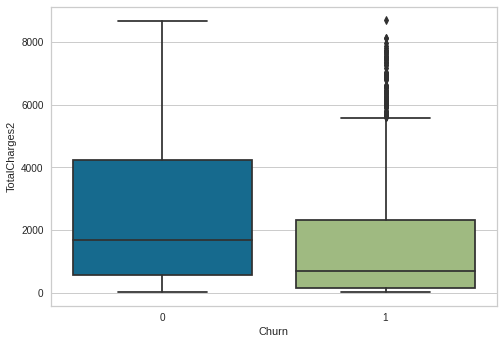

In [86]:
sns.boxplot(x=df_T2['Churn'], y=df_T2['TotalCharges2'])

variável estimada

In [87]:
# apareceram missing values após a imputação
df_T2['TotalCharges2'].describe()

count    5626.000
mean     2273.514
std      2258.384
min        18.800
25%       401.587
50%      1396.125
75%      3764.288
max      8684.800
Name: TotalCharges2, dtype: float64

In [88]:
df_T2.head()

gender Partner Dependents  ...  PaymentMethod_mv Dependents_mv     Label
id                               ...                                          
4030  Female      No         No  ...                 1             0  2806.248
6731    Male     Yes        Yes  ...                 0             0   397.566
6479  Female     Yes         No  ...                 0             0  7632.309
6861  Female      No         No  ...                 0             0  3372.579
3266    Male     Yes        Yes  ...                 0             0   787.510

[5 rows x 25 columns]

In [89]:
# localizar os missing values e preencher a posição com 'Label' da mesma posição
df_T2['TotalCharges3'] = np.where( df_T2['TotalCharges2'].isna(), df_T2['Label'], df_T2['TotalCharges2'] )

In [90]:
df_T2['TotalCharges3'].describe()

count    5634.000
mean     2273.997
std      2257.585
min        18.800
25%       402.087
50%      1397.100
75%      3764.288
max      8684.800
Name: TotalCharges3, dtype: float64

In [91]:
df_T2['TotalCharges2'].describe()

count    5626.000
mean     2273.514
std      2258.384
min        18.800
25%       401.587
50%      1396.125
75%      3764.288
max      8684.800
Name: TotalCharges2, dtype: float64

conclusão : modelo ML para tratamento dos missing values da variável 'TotalCharges2' tem estatísticas descritivas que não apontam distorções significativas

# salvar o modelo para uso futuro

In [92]:
regression.save_model(ml_lasso_TotalCharges2,'ml_lasso_TotalCharges2')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='TotalCharges2',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                              ml_usecase='regression', random_state=20111974,
                              subclass='binary', target='TotalCharges2',
                              top_features_to_pick_percentage=None)),
                 ('pca', 'passthrough'),
            

##recuperar o modelo 

In [93]:
ml_lasso_TotalCharges2_load = regression.load_model(model_name='ml_lasso_TotalCharges2')

Transformation Pipeline and Model Successfully Loaded


In [94]:
ml_lasso_TotalCharges2_load

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='TotalCharges2',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                             ml_usecase='regression', random_state=20111974,
                             subclass='binary', target='TotalCharges2',
                             top_features_to_pick_percentage=None)),
                ('pca', 'passthrough'),
                ['trained_mod

-------------------------------------------------------------------
## fazer

 tenure -> numérica -> regressão

## categóricas

PaymentMethod -> categórica -> classificação

In [103]:
def pycaret_classificacao( df, target ):
  print(f'Modelo: ml_{target}')
  print(f'Este é um problema de classificação')

  ml = classification.setup( data = df,
                            target = target,
                            session_id = 20111974,
                            train_size = 0.8,
                        normalize = True,
                        normalize_method = 'robust',
                        feature_interaction = True,
                        feature_ratio = True,
                        combine_rare_levels = True,
                        remove_multicollinearity = True,
                        profile = True,
                        fix_imbalance = True
                        )
  return ml

In [95]:
df_T3 = df_T2.copy()
df_PaymentMethod_sem_mv_copia = df_PaymentMethod_sem_mv

In [96]:
Counter( df_T3['PaymentMethod'])

Counter({'Bank transfer (automatic)': 1212,
         'Credit card (automatic)': 1164,
         'Electronic check': 1887,
         'Mailed check': 1272,
         nan: 99})

In [97]:
Counter( df_PaymentMethod_sem_mv['PaymentMethod'])

Counter({'Bank transfer (automatic)': 1069,
         'Credit card (automatic)': 1014,
         'Electronic check': 1672,
         'Mailed check': 1121})

setup

In [104]:
setup_PaymentMethod = pycaret_classificacao( df= df_PaymentMethod_sem_mv, target='PaymentMethod' )

-------------------------------------------------------------------------------

configuração para tratamento automático de missing values usando pycaret

In [ ]:
imputation_type = 'interactive',
 iterative_imputation_iters =20,
  categorical_iterative_imputer='knn',
   numeric_iterative_imputer='knn'